In [1]:
# Standard import
import os

In [2]:
os.getcwd()

'C:\\Users\\PBANE\\OneDrive - Monsanto\\Migrated from My PC\\Documents\\DataScienceAnalytics\\Python\\Python_Projects\\ML_Kaggle\\House_Price'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rawData = pd.read_csv("train.csv")

In [4]:
housingData = rawData.copy()
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housingData.iloc[:3, :5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea
0,1,60,RL,65.0,8450
1,2,20,RL,80.0,9600
2,3,60,RL,68.0,11250


In [33]:
housingData.loc[:4, 'MSZoning':'LotArea']

,MSZoning,LotFrontage,LotArea
0,RL,65.0,8450
1,RL,80.0,9600
2,RL,68.0,11250
3,RL,60.0,9550
4,RL,84.0,14260


In [41]:
housingData.loc[:10,'Id':'LotArea']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea
0,1,60,RL,65.0,8450
1,2,20,RL,80.0,9600
2,3,60,RL,68.0,11250
3,4,70,RL,60.0,9550
4,5,60,RL,84.0,14260
5,6,50,RL,85.0,14115
6,7,20,RL,75.0,10084
7,8,60,RL,NaN,10382
8,9,50,RM,51.0,6120
9,10,190,RL,50.0,7420


In [52]:
housingData.loc[2:3, 'LotArea']

2    11250
3     9550
Name: LotArea, dtype: int64

In [56]:
housingData.loc[housingData.PoolArea != 0, ['LotArea', 'MSZoning']]

,LotArea,MSZoning
197,25419,RL
810,10140,RL
1170,9880,RL
1182,15623,RL
1298,63887,RL
1386,16692,RL
1423,19690,RL


In [61]:
housingData[housingData['LotArea'] == 10140]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
542,543,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,213250
715,716,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1204,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,153500
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900


In [65]:
housingData.loc[housingData.LotArea == 10140]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
542,543,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,213250
715,716,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1204,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,153500
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900


In [74]:
housingData.loc[housingData['LotArea'] == 10140, ['MSSubClass', 'MSZoning', 'SalePrice']]

,MSSubClass,MSZoning,SalePrice
542,20,RL,213250
715,20,RL,165000
810,20,RL,181000
1204,20,RL,153500
1293,60,RL,162900


In [79]:
housingData.loc[housingData['LotArea'] == 10140, ['MSSubClass', 'MSZoning', 'SalePrice']]

,MSSubClass,MSZoning,SalePrice
542,20,RL,213250
715,20,RL,165000
810,20,RL,181000
1204,20,RL,153500
1293,60,RL,162900


In [80]:
def makeDataFrame(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

In [81]:
makeDataFrame('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [6]:
a = housingData.loc[housingData['Id'][:10], ['Id','LotArea', 'SalePrice']]

In [7]:
b = housingData.loc[housingData['Id'][:10], ['Street', 'MoSold', 'YrSold']]

In [8]:
pd.concat([a, b], axis= 1)

,Id,LotArea,SalePrice,Street,MoSold,YrSold
1,2,9600,181500,Pave,5,2007
2,3,11250,223500,Pave,9,2008
3,4,9550,140000,Pave,2,2006
4,5,14260,250000,Pave,12,2008
5,6,14115,143000,Pave,10,2009
6,7,10084,307000,Pave,8,2007
7,8,10382,200000,Pave,11,2009
8,9,6120,129900,Pave,4,2008
9,10,7420,118000,Pave,1,2008
10,11,11200,129500,Pave,2,2008


In [45]:
pd.concat([a,b], join = 'outer')

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Id,LotArea,MoSold,SalePrice,Street,YrSold
1,2.0,9600.0,NaN,181500.0,NaN,NaN
2,3.0,11250.0,NaN,223500.0,NaN,NaN
3,4.0,9550.0,NaN,140000.0,NaN,NaN
4,5.0,14260.0,NaN,250000.0,NaN,NaN
5,6.0,14115.0,NaN,143000.0,NaN,NaN
6,7.0,10084.0,NaN,307000.0,NaN,NaN
7,8.0,10382.0,NaN,200000.0,NaN,NaN
8,9.0,6120.0,NaN,129900.0,NaN,NaN
9,10.0,7420.0,NaN,118000.0,NaN,NaN
10,11.0,11200.0,NaN,129500.0,NaN,NaN


In [9]:
housingData.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [21]:
housingData.groupby('MSZoning').count()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),10,10,10,10,10,2,10,10,10,10,...,10,0,3,2,10,10,10,10,10,10
FV,65,65,57,65,65,24,65,65,65,65,...,65,0,1,0,65,65,65,65,65,65
RH,16,16,13,16,16,2,16,16,16,16,...,16,0,2,0,16,16,16,16,16,16
RL,1151,1151,922,1151,1151,20,1151,1151,1151,1151,...,1151,7,229,45,1151,1151,1151,1151,1151,1151
RM,218,218,199,218,218,43,218,218,218,218,...,218,0,46,7,218,218,218,218,218,218


In [27]:
housingData.groupby('MSZoning')[['SalePrice', 'YrSold']].min()

,SalePrice,YrSold
MSZoning,,
C (all),34900,2006
FV,144152,2006
RH,76000,2006
RL,39300,2006
RM,37900,2006


In [39]:
housingData.groupby('MSZoning')[['SalePrice', 'YrSold']].describe()

SalePrice                                                    \
             count           mean           std       min        25%   
MSZoning                                                               
C (all)       10.0   74528.000000  33791.092031   34900.0   43998.25   
FV            65.0  214014.061538  52369.662067  144152.0  174000.00   
RH            16.0  131558.375000  35714.118435   76000.0  106150.00   
RL          1151.0  191004.994787  80766.341319   39300.0  137700.00   
RM           218.0  126316.830275  48521.689833   37900.0  100000.00   

                                        YrSold                                 \
               50%       75%       max   count         mean       std     min   
MSZoning                                                                        
C (all)    74700.0   98332.0  133900.0    10.0  2008.300000  1.567021  2006.0   
FV        205950.0  250000.0  370878.0    65.0  2007.846154  1.325599  2006.0   
RH        136500.0  148608.5  200000.0    16.0  2007.500000  1.095445  2006.0   
RL        174000.0  224700.0  755000.0  1151.0  2007.824500  1.333367  2006.0   
RM        120500.0  140000.0  475000.0   218.0  2007.761468  1.308597  2006.0   

                                            
              25%     50%      75%     max  
MSZoning                                    
C (all)   2007.25  2008.5  2009.75  2010.0  
FV        2007.00  2008.0  2009.00  2010.0  
RH        2007.00  2007.0  2008.25  2009.0  
RL        2007.00  2008.0  2009.00  2010.0  
RM        2007.00  2008.0  2009.00  2010.0

In [46]:
housingData.groupby('MSZoning')[['SalePrice']].aggregate([np.mean, np.median])

SalePrice        
                   mean  median
MSZoning                       
C (all)    74528.000000   74700
FV        214014.061538  205950
RH        131558.375000  136500
RL        191004.994787  174000
RM        126316.830275  120500

In [53]:
housingData.groupby('MSZoning')[['SalePrice']].aggregate([min, max])

SalePrice        
               min     max
MSZoning                  
C (all)      34900  133900
FV          144152  370878
RH           76000  200000
RL           39300  755000
RM           37900  475000

In [66]:
housingData.groupby('SaleType')[['SalePrice']].aggregate({'meanPrice': 'min'})

SpecificationError: nested dictionary is ambiguous in aggregation

In [29]:
housingData.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


[Text(0, 0.5, 'Lot'), Text(0.5, 0, 'Sale')]

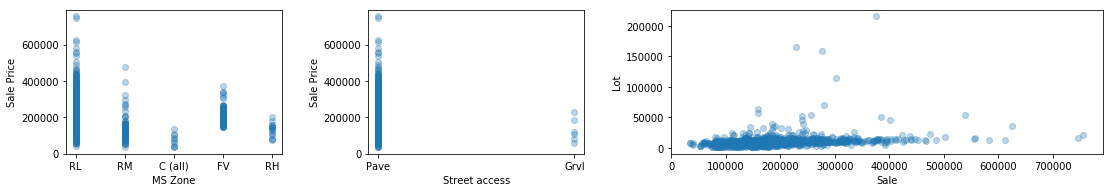

In [43]:
fig = plt.figure()

ax1 = fig.add_axes([.1, .1, .5, .5])
ax2 = fig.add_axes([.8, .1, .5, .5])
ax3 = fig.add_axes([1.5, .1, 1, .5])

ax1.plot(housingData['MSZoning'], housingData['SalePrice'], 'o', alpha = .3)
ax1.set(xlabel = "MS Zone", ylabel = 'Sale Price')

ax2.plot(housingData['Street'], housingData['SalePrice'], 'o', alpha = .3)
ax2.set(xlabel = "Street access", ylabel = 'Sale Price')

ax3.plot(housingData['SalePrice'], housingData['LotArea'], 'o', alpha = .3)
ax3.set(xlabel = 'Sale', ylabel = 'Lot')

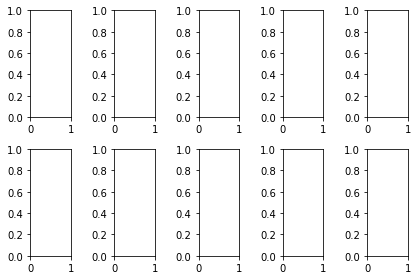

In [53]:
fig,ax = plt.subplots(nrows = 2, ncols = 5)


plt.tight_layout()

In [55]:
sns.set()

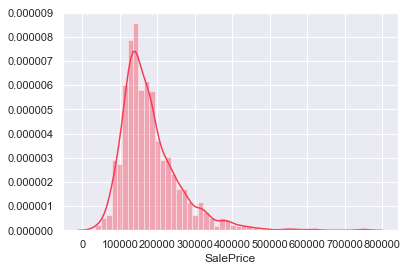

In [78]:
sns.distplot(housingData['SalePrice'], color = '#F53C55', bins= 50, kde= True)

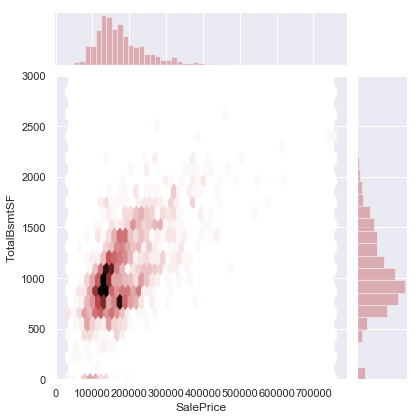

In [95]:
sns.jointplot(x = 'SalePrice', y = 'TotalBsmtSF', data = housingData, color= 'r', kind= 'hex', ylim= (0,3000))

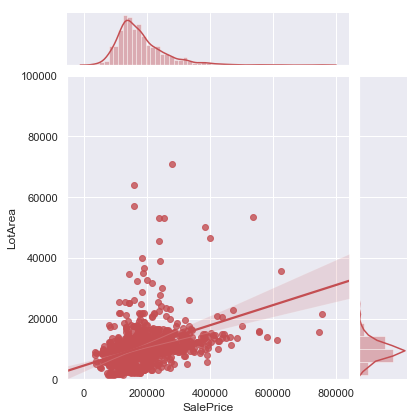

In [91]:
sns.jointplot(x = 'SalePrice', y = 'LotArea', data = housingData, color= 'r', kind= 'reg', xlim = None, ylim= (0,100000))

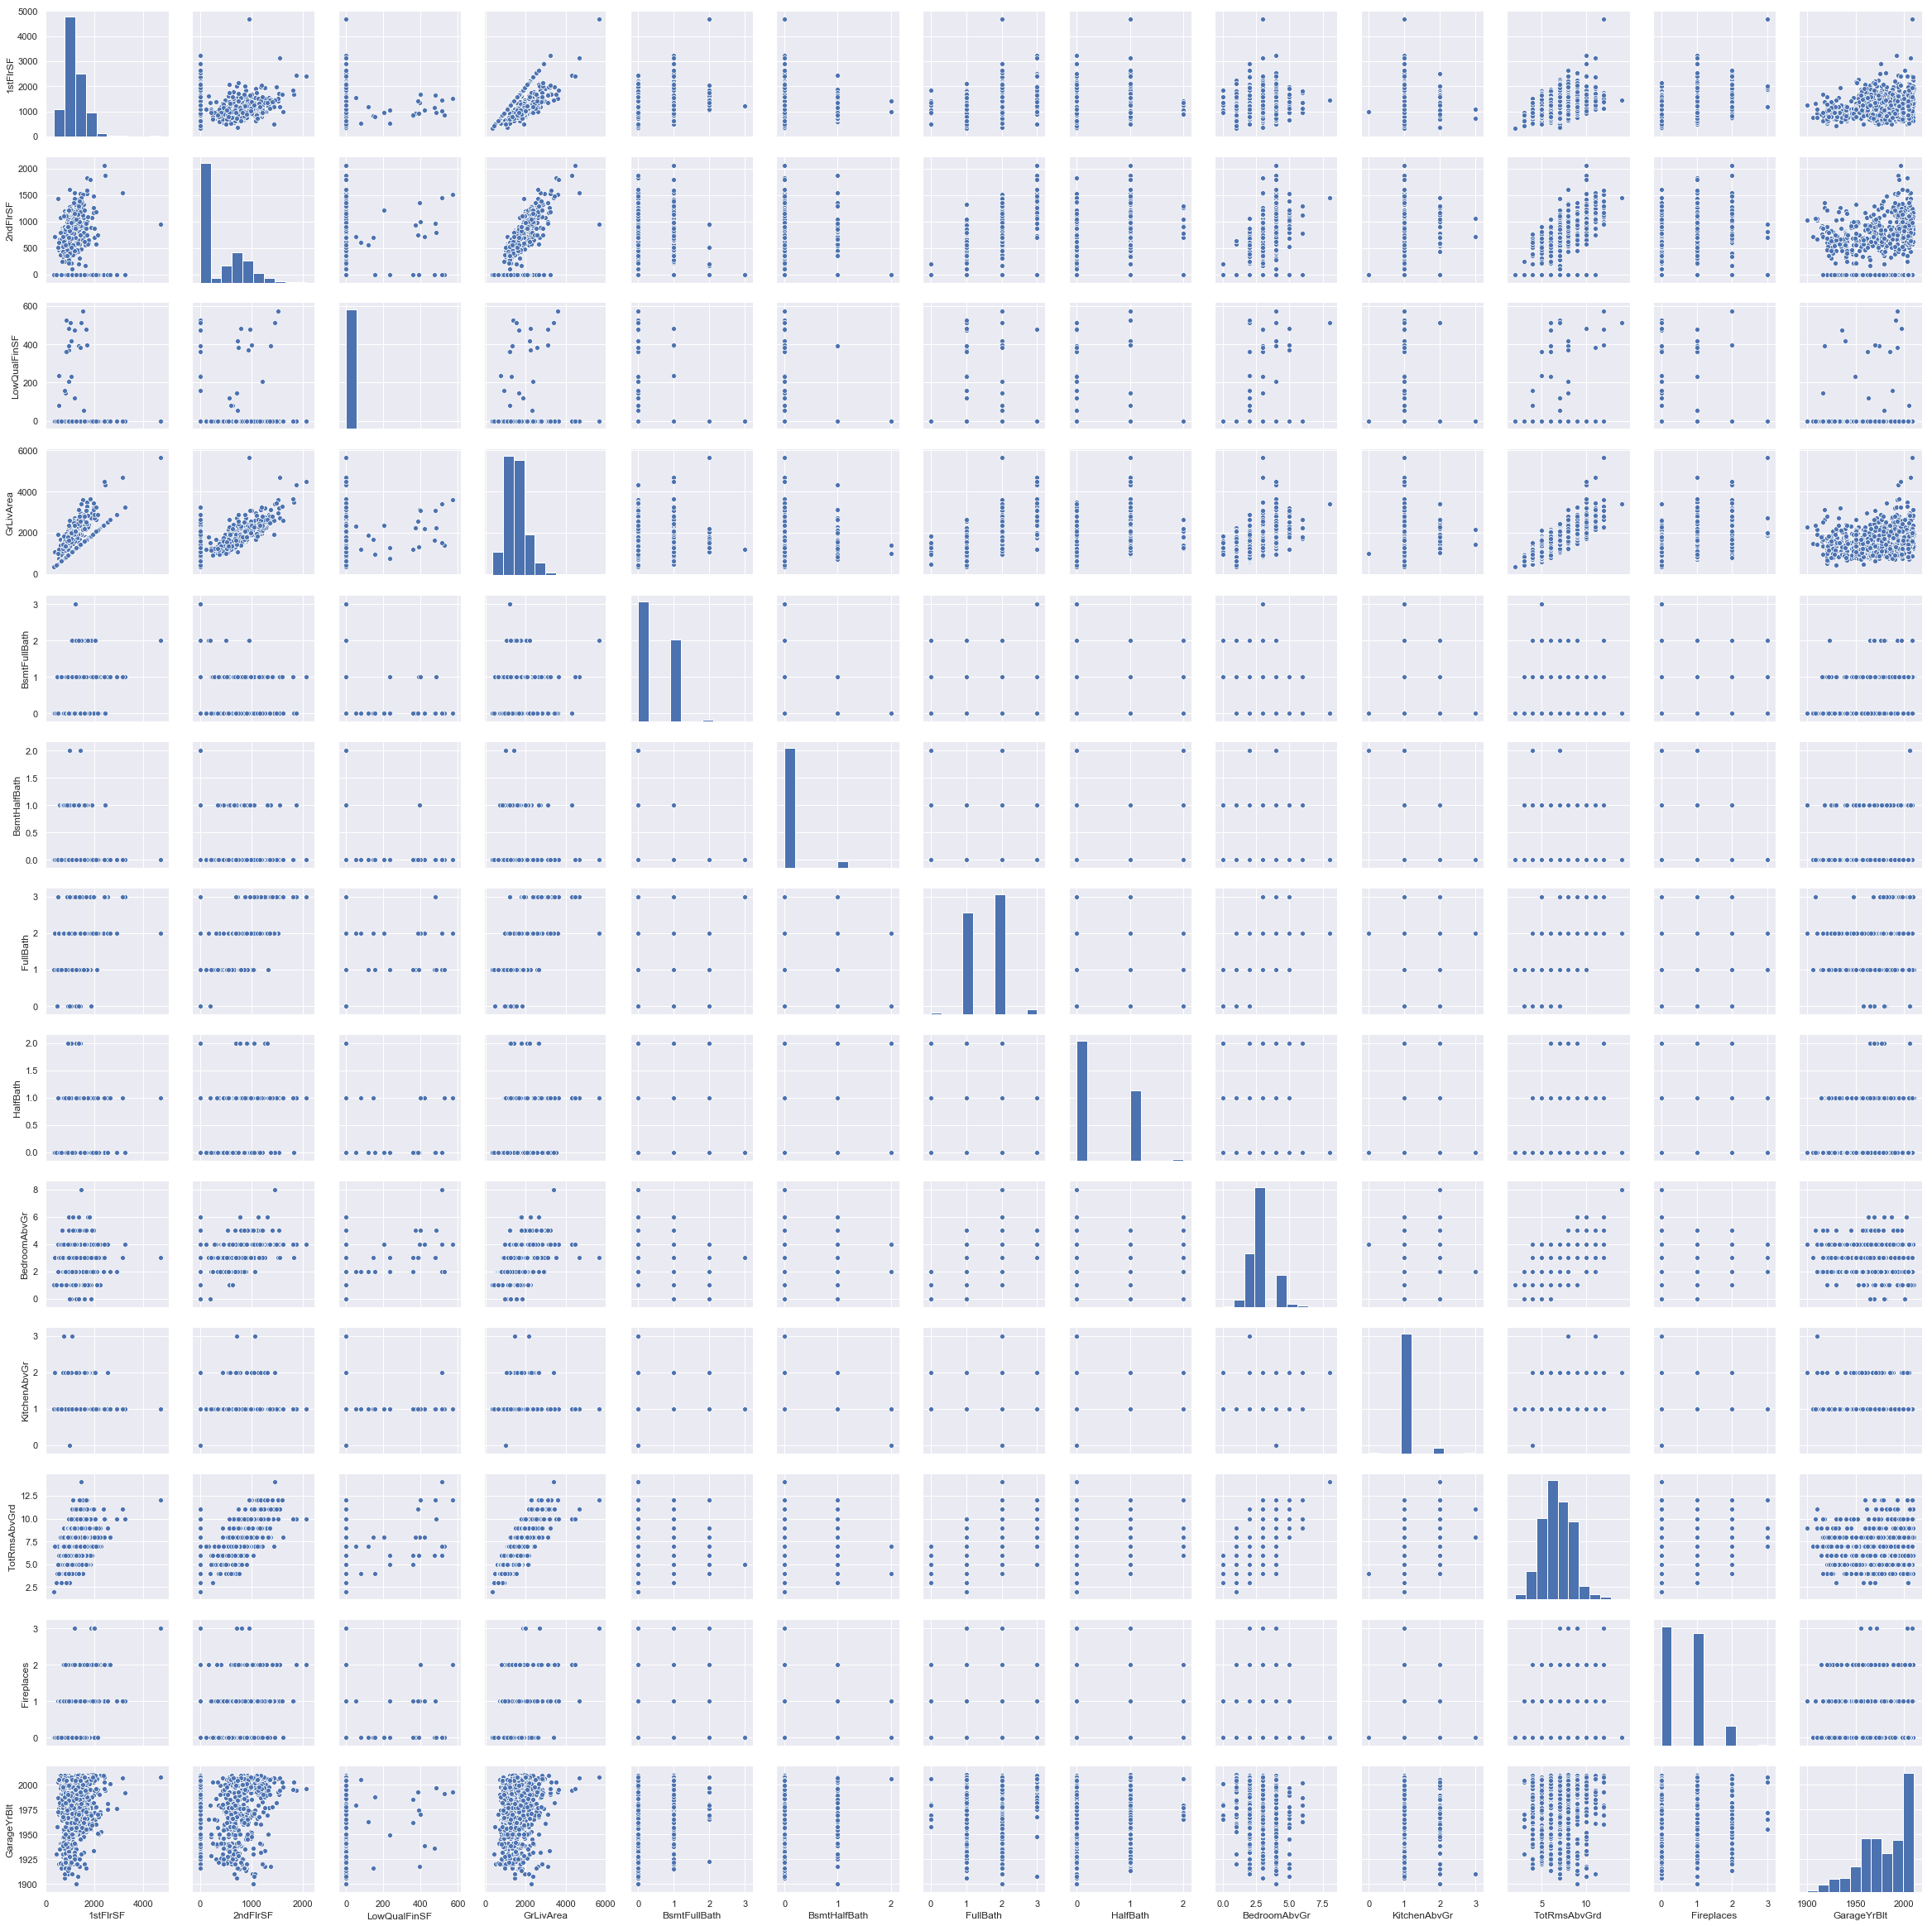

In [111]:
sns.pairplot(housingData.iloc[:, list(range(40,60))])

In [105]:
housingData.iloc[:, list(range(1,10))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub
